* [1. Creacion de Dataset](#section1)
* [2. Filtrar](#section2)
* [3. Operaciones entre columnas](#section3)
* [4. Funciones](#section4)
* [5. Mapeo](#section5)
* [6. Reordenamos columnas](#section6)
* [7. join entre tablas](#section7)
* [8. Adicionar multiples filas desde otra tabla con Append](#section8)
* [9. Agrupar](#section9)
* [10. Pivotear una tabla](#section10)
* [11. Transponer una tabla](#section11)
* [12. Visualizacion](#section12)
* [13. BASICOS](#section13)
* [13.1 Leer un archivo csv](#section131)
* [13.2 Leer un archivo Excel](#section132)


In [1]:
import pandas as pd

### paso 1 
##### lista:colchetes
### paso 2
##### diccionario:llaves
### paso 3
##### tupla:parentesis

<a id="section1"></a>
## <font color="#004D7F">1. Creacion de Dataset</font>

### Ejemplo 1 Creamos un Dataset

In [2]:

df=pd.DataFrame(data={
'nombre':['luis','nicole','mibsan','tania'],
'apellido':['gutierrez','saldaña','velasquez','vidal']
})


In [3]:
df

,nombre,apellido
0,luis,gutierrez
1,nicole,saldaña
2,mibsan,velasquez
3,tania,vidal


### Agregando una columna

In [4]:
ingreso=[1000,1500,2000,2500]

In [5]:
ingreso

[1000, 1500, 2000, 2500]

In [6]:
df['ingreso']=ingreso

In [7]:
df

,nombre,apellido,ingreso
0,luis,gutierrez,1000
1,nicole,saldaña,1500
2,mibsan,velasquez,2000
3,tania,vidal,2500


### Ejemplo 2 Creamos un DataSet 

In [8]:
#LITAS []
linea=['claro','movistar','bitel','entel']
animal=['perro','gato','delfin','lobo']

In [9]:
#DICCIONARIO {}
#TUPLA ()
df1=pd.DataFrame(data={'linea':linea,'animal':animal})

In [10]:
df1

,linea,animal
0,claro,perro
1,movistar,gato
2,bitel,delfin
3,entel,lobo


### Agregar una columna

In [11]:
ingreso_1=[20,25,30,35]

In [12]:
df1['ingreso']=ingreso_1
df1

,linea,animal,ingreso
0,claro,perro,20
1,movistar,gato,25
2,bitel,delfin,30
3,entel,lobo,35


### Ejemplo 3 Creamos un DataSet

In [13]:
df2=pd.DataFrame(data={'pais':['Mexico','Argentina','España','Colombia'],
                        'poblacion':[127212000, 45167000, 47099000, 48922000]})


In [14]:
df2

,pais,poblacion
0,Mexico,127212000
1,Argentina,45167000
2,España,47099000
3,Colombia,48922000


# juguemos con el df2

### Ordenamos por columna

In [15]:
df2.sort_values(['poblacion'])# por defecto lo ordena de menor a mayor la columna 'poblacion'!

,pais,poblacion
1,Argentina,45167000
2,España,47099000
3,Colombia,48922000
0,Mexico,127212000


In [16]:
df2.sort_values(['pais'])# por defecto lo ordena la columa 'pais' de forma abecedario!!

,pais,poblacion
1,Argentina,45167000
3,Colombia,48922000
2,España,47099000
0,Mexico,127212000


### Agregar una columna 

In [17]:
area=[1000,1500,2000,2500]

In [18]:
df2['area']=area

In [19]:
df2

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500


### Listado de la columnas

In [20]:
df2.columns

Index(['pais', 'poblacion', 'area'], dtype='object')

### Asigno el mismo valor para todas las filas de una columna nueva

In [21]:
df2['columna_nueva']='campeon'

In [22]:
df2

,pais,poblacion,area,columna_nueva
0,Mexico,127212000,1000,campeon
1,Argentina,45167000,1500,campeon
2,España,47099000,2000,campeon
3,Colombia,48922000,2500,campeon


### Eliminar una columna

In [23]:
df2=df2.drop(['columna_nueva'],axis=1)
df2

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500


### Eliminar multiples columnas

In [24]:
df2.drop(['pais','poblacion'],axis=1)

,area
0,1000
1,1500
2,2000
3,2500


In [25]:
#Como no asignamos, el df2 queda intacto
df2

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500


### Agregar una fila nueva al final

In [26]:
numero_filas=len(df2)
numero_filas

4

In [27]:
df2.loc[numero_filas]=['Venezzuela',50000,6000]# me equivoque en escribir 'Venezzuela' a proposito jeje

In [28]:
df2

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500
4,Venezzuela,50000,6000


### Actualizo la fila entera

In [29]:
df2.loc[4]=['Venezuela',50000,6000]

In [30]:
df2

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500
4,Venezuela,50000,6000


### Eliminar la ultima fila

In [31]:
df2.drop([4],axis=0)

,pais,poblacion,area
0,Mexico,127212000,1000
1,Argentina,45167000,1500
2,España,47099000,2000
3,Colombia,48922000,2500


<a id="section2"></a>
## <font color="#004D7F">2. Filtrar</font>

### 1)Paises con mas de 47099000 de habitantes

In [32]:
df2[df2['poblacion']>47099000]

,pais,poblacion,area
0,Mexico,127212000,1000
3,Colombia,48922000,2500


### 2) Paises con mas de 47099000 y un area menor 1500

In [33]:
df2[  (df2['poblacion']>47099000)   &   (df2['area']<1500)   ]

,pais,poblacion,area
0,Mexico,127212000,1000


### 3) Pais Colombia

In [34]:
df2[df2['pais']=='Colombia']

,pais,poblacion,area
3,Colombia,48922000,2500


### 4) Paises con nombre mayor a 6 letras
 

In [35]:
df2[      df2['pais'].str.len()  > 6     ]

,pais,poblacion,area
1,Argentina,45167000,1500
3,Colombia,48922000,2500
4,Venezuela,50000,6000


In [36]:
#observar lo que hemos creado!
%whos

Variable       Type         Data/Info
-------------------------------------
animal         list         n=4
area           list         n=4
df             DataFrame       nombre   apellido  ing<...>tania      vidal     2500
df1            DataFrame          linea  animal  ingr<...>   entel    lobo       35
df2            DataFrame            pais  poblacion  <...>enezuela      50000  6000
ingreso        list         n=4
ingreso_1      list         n=4
linea          list         n=4
numero_filas   int          4
pd             module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


<a id="section3"></a>
## <font color="#004D7F">3. Operaciones entre columnas</font>

##### Crearemos una nueva columna le llamaremos 'habitantes_por_km2' donde sera la division entre la columna 'poblacion' y la columna 'area'

In [37]:
df2['habitantes_por_km2']=df2['poblacion']/df2['area']

In [38]:
df2

,pais,poblacion,area,habitantes_por_km2
0,Mexico,127212000,1000,127212.000000
1,Argentina,45167000,1500,30111.333333
2,España,47099000,2000,23549.500000
3,Colombia,48922000,2500,19568.800000
4,Venezuela,50000,6000,8.333333


<a id="section4"></a>
## <font color="#004D7F">4. Funciones</font>

### De minuscula a mayuscula

In [39]:
def minus_a_mayus(name):
    name=name.upper() # de minuscula a mayuscula
    name=name[0:5]# las 5 primeras letras
    return name

In [40]:
df2['minus_a_mayus']=df2['pais'].apply(minus_a_mayus)

In [41]:
df2

,pais,poblacion,area,habitantes_por_km2,minus_a_mayus
0,Mexico,127212000,1000,127212.000000,MEXIC
1,Argentina,45167000,1500,30111.333333,ARGEN
2,España,47099000,2000,23549.500000,ESPAÑ
3,Colombia,48922000,2500,19568.800000,COLOM
4,Venezuela,50000,6000,8.333333,VENEZ


### Creando Categorias

In [42]:
def categoria(x):
    pob=x['poblacion']
    habitantes_por_km2=x['habitantes_por_km2']
    if pob> 47099000:
        if habitantes_por_km2<23549.500000:
            return 'A'
        else:
            return 'B'
    return 'C'    
          

In [43]:
df2['categoria']=df2.apply(categoria,axis=1)

In [44]:
df2

,pais,poblacion,area,habitantes_por_km2,minus_a_mayus,categoria
0,Mexico,127212000,1000,127212.000000,MEXIC,B
1,Argentina,45167000,1500,30111.333333,ARGEN,C
2,España,47099000,2000,23549.500000,ESPAÑ,C
3,Colombia,48922000,2500,19568.800000,COLOM,A
4,Venezuela,50000,6000,8.333333,VENEZ,C


### Aplicar las columnas como parametros

In [45]:
def asigna_color(minus_a_mayus,categoria):
    if categoria=='A':
        return 'rojo'
    if minus_a_mayus=='MEXIC':
        return 'verde'
    return 'azul'

In [46]:
df2['color']=df2.apply(lambda x:asigna_color(x['minus_a_mayus'],x['categoria']), axis=1)

In [47]:
df2

,pais,poblacion,area,habitantes_por_km2,minus_a_mayus,categoria,color
0,Mexico,127212000,1000,127212.000000,MEXIC,B,verde
1,Argentina,45167000,1500,30111.333333,ARGEN,C,azul
2,España,47099000,2000,23549.500000,ESPAÑ,C,azul
3,Colombia,48922000,2500,19568.800000,COLOM,A,rojo
4,Venezuela,50000,6000,8.333333,VENEZ,C,azul


<a id="section5"></a>
## <font color="#004D7F">5. Mapeo</font>

In [48]:
df2['mapeo_color']=df2['color'].map({'azul':0,'rojo':1,'verde':2}).astype(int)
df2

,pais,poblacion,area,habitantes_por_km2,minus_a_mayus,categoria,color,mapeo_color
0,Mexico,127212000,1000,127212.000000,MEXIC,B,verde,2
1,Argentina,45167000,1500,30111.333333,ARGEN,C,azul,0
2,España,47099000,2000,23549.500000,ESPAÑ,C,azul,0
3,Colombia,48922000,2500,19568.800000,COLOM,A,rojo,1
4,Venezuela,50000,6000,8.333333,VENEZ,C,azul,0


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pais                5 non-null      object 
 1   poblacion           5 non-null      int64  
 2   area                5 non-null      int64  
 3   habitantes_por_km2  5 non-null      float64
 4   minus_a_mayus       5 non-null      object 
 5   categoria           5 non-null      object 
 6   color               5 non-null      object 
 7   mapeo_color         5 non-null      int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 512.0+ bytes


<a id="section6"></a>
## <font color="#004D7F">6. Reordenamos columnas</font>

In [50]:
df2.columns

Index(['pais', 'poblacion', 'area', 'habitantes_por_km2', 'minus_a_mayus',
       'categoria', 'color', 'mapeo_color'],
      dtype='object')

In [51]:
df2.shape

(5, 8)

In [52]:
df2=df2[['minus_a_mayus','categoria','color','pais', 'poblacion', 'area','habitantes_por_km2','mapeo_color']]

In [53]:
df2

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
0,MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2
1,ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0
2,ESPAÑ,C,azul,España,47099000,2000,23549.500000,0
3,COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1
4,VENEZ,C,azul,Venezuela,50000,6000,8.333333,0


<a id="section7"></a>
## <font color="#004D7F">7. join entre tablas</font>

### concat usando indice

### Creando un nuevo Dataset  <br>    <br >'df_comida'

In [54]:
df2.minus_a_mayus.unique

<bound method Series.unique of 0    MEXIC
1    ARGEN
2    ESPAÑ
3    COLOM
4    VENEZ
Name: minus_a_mayus, dtype: object>

In [55]:
# creamos un DF nuevo, le asignamos el codigo como identificador unico
df_comida=pd.DataFrame(data={
    'comida':['chaufa','pollo_brasa','lentejitas','hamburguesas','bistek']},
    index=['MEXIC','ARGEN','ESPAÑ','COLOM','VENEZ'])#indice

In [56]:
df_comida

,comida
MEXIC,chaufa
ARGEN,pollo_brasa
ESPAÑ,lentejitas
COLOM,hamburguesas
VENEZ,bistek


### 'df2'

In [57]:
df2

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
0,MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2
1,ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0
2,ESPAÑ,C,azul,España,47099000,2000,23549.500000,0
3,COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1
4,VENEZ,C,azul,Venezuela,50000,6000,8.333333,0


### Asignamos indice a la columna 'minus_a_mayus' en nuestro df2 


In [58]:
df2_indice=df2.set_index('minus_a_mayus')

In [59]:
df2_indice

,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
minus_a_mayus,,,,,,,
MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2
ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0
ESPAÑ,C,azul,España,47099000,2000,23549.500000,0
COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1
VENEZ,C,azul,Venezuela,50000,6000,8.333333,0


### Hacemos un join

In [60]:
result=pd.concat([df2_indice,df_comida],axis=1,sort=True)

In [61]:
result

,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color,comida
ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0,pollo_brasa
COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1,hamburguesas
ESPAÑ,C,azul,España,47099000,2000,23549.500000,0,lentejitas
MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2,chaufa
VENEZ,C,azul,Venezuela,50000,6000,8.333333,0,bistek


### Creando un DataFrame nuevo <br>  <br>'df_factor'

In [69]:
df_factor=pd.DataFrame(data={'categoria':['A','B','C'],
                              'Factor':[12.5,15.5,0.02]})
df_factor

,categoria,Factor
0,A,12.50
1,B,15.50
2,C,0.02


Fuente: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [70]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

In [71]:
df2

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
0,MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2
1,ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0
2,ESPAÑ,C,azul,España,47099000,2000,23549.500000,0
3,COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1
4,VENEZ,C,azul,Venezuela,50000,6000,8.333333,0


In [83]:
result2=pd.merge(df2,df_factor,how='left',on=['categoria'])
result2

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color,Factor
0,MEXIC,B,verde,Mexico,127212000,1000,127212.000000,2,15.50
1,ARGEN,C,azul,Argentina,45167000,1500,30111.333333,0,0.02
2,ESPAÑ,C,azul,España,47099000,2000,23549.500000,0,0.02
3,COLOM,A,rojo,Colombia,48922000,2500,19568.800000,1,12.50
4,VENEZ,C,azul,Venezuela,50000,6000,8.333333,0,0.02


<a id="section8"></a>
## <font color="#004D7F">8. Adicionar multiples filas desde otra tabla con Append</font>


In [84]:
#Supongamos que tenemos otra tabla:
df_otros=pd.DataFrame(data={'pais':['Brasil','Chile'],
                             'poblacion':[15000,4000],
                             'area':[85200,87452]})
df_otros

,pais,poblacion,area
0,Brasil,15000,85200
1,Chile,4000,87452


In [85]:
#Queremos agregar estas filas al final
df2.append(df_otros,ignore_index=True,sort=True)

,area,categoria,color,habitantes_por_km2,mapeo_color,minus_a_mayus,pais,poblacion
0,1000,B,verde,127212.000000,2.0,MEXIC,Mexico,127212000
1,1500,C,azul,30111.333333,0.0,ARGEN,Argentina,45167000
2,2000,C,azul,23549.500000,0.0,ESPAÑ,España,47099000
3,2500,A,rojo,19568.800000,1.0,COLOM,Colombia,48922000
4,6000,C,azul,8.333333,0.0,VENEZ,Venezuela,50000
5,85200,NaN,NaN,NaN,NaN,NaN,Brasil,15000
6,87452,NaN,NaN,NaN,NaN,NaN,Chile,4000


<a id="section9"></a>
## <font color="#004D7F">9. Agrupar</font>

In [86]:
# agrupo por categoria y sumo cuantos hay de cada una
grupo2 = df2.groupby(['categoria']).size()
grupo2

categoria
A    1
B    1
C    3
dtype: int64

In [87]:
# agrupo por cateroría y sumo
grupo1 = df2.groupby(['categoria']).sum().sort_values(["poblacion"])
grupo1

,poblacion,area,habitantes_por_km2,mapeo_color
categoria,,,,
A,48922000,2500,19568.800000,1
C,92316000,9500,53669.166667,0
B,127212000,1000,127212.000000,2


### Agrupamos por 2 variables y sumarizamos

In [100]:
tabla=result2[['categoria','Factor']].groupby(['categoria'], as_index=False).agg(['mean', 'count', 'sum'])
tabla

Factor             
            mean count    sum
categoria                    
A          12.50     1  12.50
B          15.50     1  15.50
C           0.02     3   0.06

<a id="section10"></a>
## <font color="#004D7F">10. Pivotear una tabla</font>

In [104]:
result2.columns

Index(['minus_a_mayus', 'categoria', 'color', 'pais', 'poblacion', 'area',
       'habitantes_por_km2', 'mapeo_color', 'Factor'],
      dtype='object')

In [102]:
tabla_t = pd.pivot_table(result2, index='categoria', columns='pais', values='area').fillna(0)#los NAN  se rellena con 0
tabla_t

pais,Argentina,Colombia,España,Mexico,Venezuela
categoria,,,,,
A,0.0,2500.0,0.0,0.0,0.0
B,0.0,0.0,0.0,1000.0,0.0
C,1500.0,0.0,2000.0,0.0,6000.0


<a id="section11"></a>
## <font color="#004D7F">11. Transponer una tabla</font>

In [106]:
df2.T

,0,1,2,3,4
minus_a_mayus,MEXIC,ARGEN,ESPAÑ,COLOM,VENEZ
categoria,B,C,C,A,C
color,verde,azul,azul,rojo,azul
pais,Mexico,Argentina,España,Colombia,Venezuela
poblacion,127212000,45167000,47099000,48922000,50000
area,1000,1500,2000,2500,6000
habitantes_por_km2,127212.0,30111.333333,23549.5,19568.8,8.333333
mapeo_color,2,0,0,1,0


<a id="section12"></a>
## <font color="#004D7F">12. Visualizacion</font>

<AxesSubplot:ylabel='Frequency'>

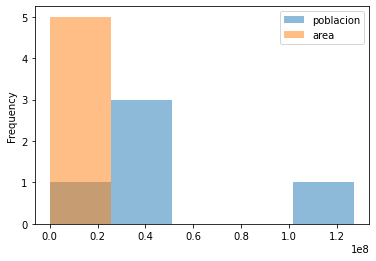

In [111]:
#import matplotlib.pyplot as plt
%matplotlib inline

df2[['poblacion','area']].plot.hist(bins=5,alpha=0.5)


<AxesSubplot:xlabel='pais'>

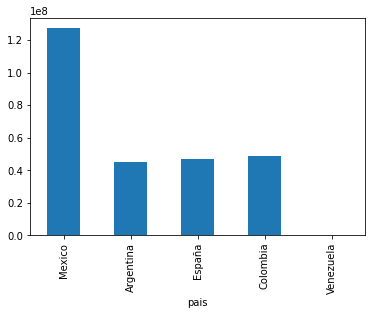

In [112]:
df2.set_index('pais')['poblacion'].plot(kind='bar')

In [113]:
df2.columns

Index(['minus_a_mayus', 'categoria', 'color', 'pais', 'poblacion', 'area',
       'habitantes_por_km2', 'mapeo_color'],
      dtype='object')

<AxesSubplot:xlabel='pais'>

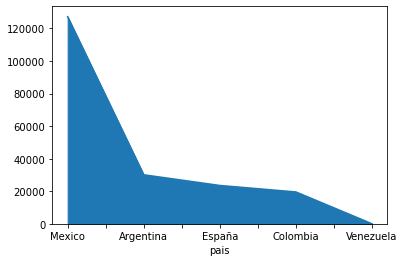

In [114]:
df2.set_index('pais')['habitantes_por_km2'].plot(kind='area')

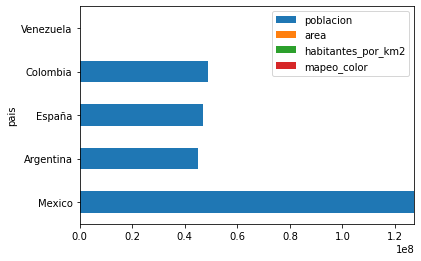

In [115]:
df2.set_index('pais').plot.barh(stacked=True);

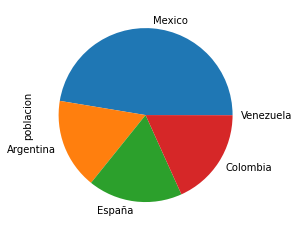

In [117]:
df2.set_index('pais')['poblacion'].plot.pie();

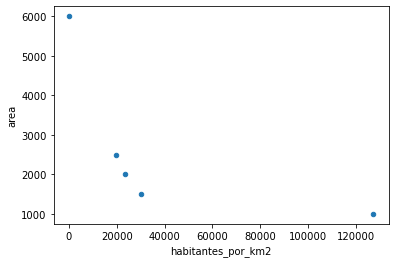

In [119]:
df2.plot.scatter(x='habitantes_por_km2', y='area');

<a id="section13"></a>
## <font color="#004D7F">13. BASICOS</font>

<a id="section131"></a>
## <font color="#004D7F">13.1 Leer un archivo csv</font>


In [126]:
df_csv = pd.read_csv("Datos/train.csv",sep=",")

In [127]:
df_csv

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.027684,0.0,1.643168,0.0,0.0,0.163003,0.086540,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.022507,0.0,1.516575,0.0,0.0,0.142583,0.093479,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.028242,0.0,1.816590,0.0,0.0,0.137113,0.116735,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.028081,0.0,1.643168,0.0,0.0,0.138094,0.112731,1,1,2


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   minus_a_mayus       5 non-null      object 
 1   categoria           5 non-null      object 
 2   color               5 non-null      object 
 3   pais                5 non-null      object 
 4   poblacion           5 non-null      int64  
 5   area                5 non-null      int64  
 6   habitantes_por_km2  5 non-null      float64
 7   mapeo_color         5 non-null      int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 512.0+ bytes


In [129]:
### Estadisticas sobre las columnas numericas
df2.describe(include='all')#df2.describe(include='all')

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
count,5,5,5,5,5.000000e+00,5.000000,5.000000,5.000000
unique,5,3,3,5,NaN,NaN,NaN,NaN
top,MEXIC,C,azul,Mexico,NaN,NaN,NaN,NaN
freq,1,3,3,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.369000e+07,2600.000000,40089.993333,0.600000
std,NaN,NaN,NaN,NaN,4.588450e+07,1981.161276,49977.656170,0.894427
min,NaN,NaN,NaN,NaN,5.000000e+04,1000.000000,8.333333,0.000000
25%,NaN,NaN,NaN,NaN,4.516700e+07,1500.000000,19568.800000,0.000000
50%,NaN,NaN,NaN,NaN,4.709900e+07,2000.000000,23549.500000,0.000000
75%,NaN,NaN,NaN,NaN,4.892200e+07,2500.000000,30111.333333,1.000000


In [130]:
df2.area.describe()

count       5.000000
mean     2600.000000
std      1981.161276
min      1000.000000
25%      1500.000000
50%      2000.000000
75%      2500.000000
max      6000.000000
Name: area, dtype: float64

In [133]:
df2.head(1)

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
0,MEXIC,B,verde,Mexico,127212000,1000,127212.0,2


In [134]:
df2.tail(1)

,minus_a_mayus,categoria,color,pais,poblacion,area,habitantes_por_km2,mapeo_color
4,VENEZ,C,azul,Venezuela,50000,6000,8.333333,0


In [135]:
## cantidad de filas
len(df2)

5

In [136]:
## dimensiones del dataframe (filas, columnas)
df2.shape

(5, 8)

In [137]:
###iterar un DataFrame
for index, row in df2.iterrows():
    print(index,row['pais'])

0 Mexico
1 Argentina
2 España
3 Colombia
4 Venezuela


In [138]:
df2.columns

Index(['minus_a_mayus', 'categoria', 'color', 'pais', 'poblacion', 'area',
       'habitantes_por_km2', 'mapeo_color'],
      dtype='object')

In [139]:
# Obtener sumatoria, media y cantidad de una columna
print("el valor de habit_x_mk2 promedio",df2['habitantes_por_km2'].mean())
print("el valor de habit_x_mk2 suma",df2['habitantes_por_km2'].sum())
print("el valor de habit_x_mk2 contabilkización",df2['habitantes_por_km2'].count())
print("el valor de habit_x_mk2 valor min",df2['habitantes_por_km2'].min())
print("el valor de habit_x_mk2 valor max",df2['habitantes_por_km2'].max())

el valor de habit_x_mk2 promedio 40089.99333333333
el valor de habit_x_mk2 suma 200449.96666666667
el valor de habit_x_mk2 contabilkización 5
el valor de habit_x_mk2 valor min 8.333333333333334
el valor de habit_x_mk2 valor max 127212.0


In [140]:
# Revisar si tenemos nulos en la tabla
df2.isnull().sum()

minus_a_mayus         0
categoria             0
color                 0
pais                  0
poblacion             0
area                  0
habitantes_por_km2    0
mapeo_color           0
dtype: int64

In [141]:
# acceso a una columna
df2.area

0    1000
1    1500
2    2000
3    2500
4    6000
Name: area, dtype: int64

In [142]:
df2['area']

0    1000
1    1500
2    2000
3    2500
4    6000
Name: area, dtype: int64

In [143]:
df2.categoria.unique()

array(['B', 'C', 'A'], dtype=object)

In [145]:
# cantidad de unicos
len(df2.categoria.unique())

3

In [146]:
#obtener ultima fila
df2.iloc[-1]

minus_a_mayus             VENEZ
categoria                     C
color                      azul
pais                  Venezuela
poblacion                 50000
area                       6000
habitantes_por_km2     8.333333
mapeo_color                   0
Name: 4, dtype: object

In [148]:
#obtener primera fila
df2.iloc[0]

minus_a_mayus             MEXIC
categoria                     B
color                     verde
pais                     Mexico
poblacion             127212000
area                       1000
habitantes_por_km2     127212.0
mapeo_color                   2
Name: 0, dtype: object

In [152]:
# obtener primera columna
df2.iloc[:,0]

0    MEXIC
1    ARGEN
2    ESPAÑ
3    COLOM
4    VENEZ
Name: minus_a_mayus, dtype: object

In [153]:
# Busco por indice
df2.loc[2]

minus_a_mayus            ESPAÑ
categoria                    C
color                     azul
pais                    España
poblacion             47099000
area                      2000
habitantes_por_km2     23549.5
mapeo_color                  0
Name: 2, dtype: object

<a id="section132"></a>
## <font color="#004D7F">13.2 Leer un archivo Excel</font>

In [ ]:
pd.read_excel ("nombre_archivo.xlsx",sheet_name="nombre_hoja")